## Assignment 1 - Data Curation; DATA 512

Import statements below

In [1]:
import json
import datetime
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### STEP 1:
#### Endpoints for our api that will allow us to get information.

In [2]:
# endpoints for our api
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

#### Below we set up for our API calls in both Legacy and Pageview API frameworks and provide the corresponding parameters needed for the API calls. This code is based on Jupyter notebook found here:  https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb

Legacy API corresponds to pagecount while the modern API corresponds to pageview

In [3]:
# Pagecount (Legacy) parameters for desktop and mobile

pagecount_desktop_views = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007123100",  # "2008010100"
                # for end use 1st day of month following final month of data
                 "end" : "2021083100"   # "2022010100"
                    }

pagecount_mobile_views = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007123100",
                # for end use 1st day of month following final month of data
                 "end" : "2021083100"   # "2022010100"
                    }
#===================================================================================================

#Pageview(modern) parameters for desktop, mobile-app, mobile-web

pageview_desktop_views = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007123100",
                    # for end use 1st day of month following final month of data
                    "end" : "2021083100"
                        }

pageview_mobileapp_views = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007123100",
                    # for end use 1st day of month following final month of data
                    "end" : "2021083100"
                        }

pageview_mobileweb_views = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007123100",
                    # for end use 1st day of month following final month of data
                    "end" : "2021083100"
                        }

# My information
headers = {
    'User-Agent': 'https://github.com/Samperebikovsky',
    'From': 'sampereb@uw.edu'
}

#### Function to perform api_call (not mine, credit to https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb)

In [4]:
# Function to perform api_call (not mine, credit to https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb)

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

#### Here we are making the API calls and recieving information in JSON form

In [5]:
legacy_mobile = api_call(endpoint_legacy, pagecount_mobile_views)
legacy_desktop = api_call(endpoint_legacy, pagecount_desktop_views)

In [6]:
pageview_mobileapp = api_call(endpoint_pageviews, pageview_mobileapp_views)
pageview_mobileweb = api_call(endpoint_pageviews, pageview_mobileweb_views)
pageview_desktop = api_call(endpoint_pageviews, pageview_desktop_views)

#### Writing JSON data to JSON files as per HW instructions

In [7]:
with open('pagecounts_desktop-site_200801-202201.json', 'w') as f:
    json.dump(legacy_desktop, f)
    
with open('pagecounts_mobile-site_200801-202201.json', 'w') as f:
    json.dump(legacy_mobile, f)

In [8]:
with open('pageviews_mobile-app-site_200801-202201.json', 'w') as f:
    json.dump(pageview_mobileapp, f)
    
with open('pageviews_mobile-web-site_200801-202201.json', 'w') as f:
    json.dump(pageview_mobileweb, f)

with open('pageviews_desktop-site_200801-202201.json', 'w') as f:
    json.dump(pageview_desktop, f)

### STEP 2:
#### First we are trying to combine both 'mobile' information from pageviews into one place. I convert to dataframes to make this easier for me

In [9]:
pageview_mobilewebDf = pd.DataFrame(pageview_mobileweb.pop('items'))
pageview_mobileappDf = pd.DataFrame(pageview_mobileapp.pop('items'))
pageview_desktopDf = pd.DataFrame(pageview_desktop.pop('items'))
#=============================================================================
legacy_desktopDf = pd.DataFrame(legacy_desktop.pop('items'))
legacy_mobileDf = pd.DataFrame(legacy_mobile.pop('items'))

In [10]:
pageview_mobilewebDf

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145
...,...,...,...,...,...,...
69,en.wikipedia,mobile-web,user,monthly,2021040100,4596834586
70,en.wikipedia,mobile-web,user,monthly,2021050100,4810094479
71,en.wikipedia,mobile-web,user,monthly,2021060100,4433805793
72,en.wikipedia,mobile-web,user,monthly,2021070100,4617448266


#### Now we are combining the two different mobile traffics (app/web) into 1 and observing if our result here makes sense

In [11]:
pageview_mobileDf = pageview_mobilewebDf[['project', 'access', 'agent','granularity','timestamp']]
pageview_mobileDf['views'] = pageview_mobileappDf['views'] + pageview_mobilewebDf['views']
pageview_mobileDf

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3288755294
1,en.wikipedia,mobile-web,user,monthly,2015080100,3302333038
2,en.wikipedia,mobile-web,user,monthly,2015090100,3170203333
3,en.wikipedia,mobile-web,user,monthly,2015100100,3268499132
4,en.wikipedia,mobile-web,user,monthly,2015110100,3236601070
...,...,...,...,...,...,...
69,en.wikipedia,mobile-web,user,monthly,2021040100,4759095083
70,en.wikipedia,mobile-web,user,monthly,2021050100,4976579558
71,en.wikipedia,mobile-web,user,monthly,2021060100,4584510417
72,en.wikipedia,mobile-web,user,monthly,2021070100,4778909421


#### Now we fix the timestamp format in legacy and pageview and convert it to a format that suits us better, we also drop columns we dont need.

In [12]:
for j in [pageview_desktopDf, pageview_mobileDf]:
    timeList = [(i[:-4][0:4],i[:-4][4:6]) for i in j['timestamp']]
    j[['year', 'month']] = pd.DataFrame(timeList)
    j.drop(columns = ['project','access','agent','granularity','timestamp'], inplace = True)

#========================================================================================================

for j in [legacy_desktopDf, legacy_mobileDf]:
    timeList = [(i[:-4][0:4],i[:-4][4:6]) for i in j['timestamp']]
    j[['year', 'month']] = pd.DataFrame(timeList)
    j.drop(columns = ['project','access-site','granularity','timestamp'], inplace = True)


In [13]:
# pageview_desktopDf, pageview_mobileDf, legacy_desktopDf, legacy_mobileDf

In [14]:
# pageview_allDf = pageview_desktopDf[['year', 'month']]
# pageview_allDf['views'] = pageview_desktopDf['views'] + pageview_mobileDf['views']

In [15]:
# legacy_allDf = legacy_desktopDf[['year', 'month']]
# legacy_allDf['count'] = legacy_desktopDf['count'] + legacy_mobileDf['count']
# legacy_allDf

#### Renaming the columns to something that suits us better and matches the instructions.

In [16]:
# pageview_desktopDf, pageview_mobileDf, pageview_allDf  |||   legacy_desktopDf, legacy_mobileDf, legacy_AllDf

pageview_desktopDf.rename({'views' : 'pageview_desktop_views'}, axis = 1, inplace = True)
pageview_mobileDf.rename({'views' : 'pageview_mobile_views'}, axis = 1, inplace = True)
#pageview_allDf.rename({'views' : 'pageview_all_views'}, axis = 1, inplace = True)
#============================================================================================
legacy_desktopDf.rename({'count' : 'pagecount_desktop_views'}, axis = 1, inplace = True)
legacy_mobileDf.rename({'count' : 'pagecount_mobile_views'}, axis = 1, inplace = True)
#legacy_allDf.rename({'count' : 'pagecount_all_views'}, axis = 1, inplace = True)

#### Merging all dataframes into one so that we can create our 'all' columns and then output our final csv file.

In [17]:

masterDf = legacy_desktopDf.merge(legacy_mobileDf, how = 'outer', on = ['year', 'month'])
#masterDf = masterDf.merge(pageview_allDf, how = 'outer', on = ['year', 'month'])
masterDf = masterDf.merge(pageview_desktopDf, how = 'outer', on = ['year', 'month'])
masterDf = masterDf.merge(pageview_mobileDf, how = 'outer', on = ['year', 'month'])
masterDf

,pagecount_desktop_views,year,month,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,4.930903e+09,2008,01,NaN,NaN,NaN
1,4.818394e+09,2008,02,NaN,NaN,NaN
2,4.955406e+09,2008,03,NaN,NaN,NaN
3,5.159162e+09,2008,04,NaN,NaN,NaN
4,5.584691e+09,2008,05,NaN,NaN,NaN
...,...,...,...,...,...,...
159,NaN,2021,04,NaN,2.882714e+09,4.759095e+09
160,NaN,2021,05,NaN,2.824416e+09,4.976580e+09
161,NaN,2021,06,NaN,2.505971e+09,4.584510e+09
162,NaN,2021,07,NaN,2.765584e+09,4.778909e+09


#### Combining views into 'all', essentially taking the sum so we can view all traffic combined. Originally did before merging but summing before merging into one provides the wrong data because the dates do not match in the legacy mobile vs. desktop. 

In [18]:
masterDf['pagecount_all_views'] = masterDf['pagecount_desktop_views'] + masterDf['pagecount_mobile_views']
masterDf['pageview_all_views'] = masterDf['pageview_desktop_views'] + masterDf['pageview_mobile_views']
masterDf

,pagecount_desktop_views,year,month,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,4.930903e+09,2008,01,NaN,NaN,NaN,NaN,NaN
1,4.818394e+09,2008,02,NaN,NaN,NaN,NaN,NaN
2,4.955406e+09,2008,03,NaN,NaN,NaN,NaN,NaN
3,5.159162e+09,2008,04,NaN,NaN,NaN,NaN,NaN
4,5.584691e+09,2008,05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
159,NaN,2021,04,NaN,2.882714e+09,4.759095e+09,NaN,7.641810e+09
160,NaN,2021,05,NaN,2.824416e+09,4.976580e+09,NaN,7.800996e+09
161,NaN,2021,06,NaN,2.505971e+09,4.584510e+09,NaN,7.090482e+09
162,NaN,2021,07,NaN,2.765584e+09,4.778909e+09,NaN,7.544494e+09


#### Re-ordering columns to something easier to read

In [19]:
cols = masterDf.columns.tolist()
cols = cols[1:3] + [cols[0]] + cols[3:8]
cols

masterDf = masterDf[cols]
masterDf

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2008,01,4.930903e+09,NaN,NaN,NaN,NaN,NaN
1,2008,02,4.818394e+09,NaN,NaN,NaN,NaN,NaN
2,2008,03,4.955406e+09,NaN,NaN,NaN,NaN,NaN
3,2008,04,5.159162e+09,NaN,NaN,NaN,NaN,NaN
4,2008,05,5.584691e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
159,2021,04,NaN,NaN,2.882714e+09,4.759095e+09,NaN,7.641810e+09
160,2021,05,NaN,NaN,2.824416e+09,4.976580e+09,NaN,7.800996e+09
161,2021,06,NaN,NaN,2.505971e+09,4.584510e+09,NaN,7.090482e+09
162,2021,07,NaN,NaN,2.765584e+09,4.778909e+09,NaN,7.544494e+09


#### Replacing null values with 0 as required by the instructions

In [20]:
tocsv = masterDf.fillna(0)
masterDf.sort_values(['year', 'month'], inplace =True)
tocsv.sort_values(['year', 'month'], inplace =True)
tocsv

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2008,01,4.930903e+09,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1,2008,02,4.818394e+09,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,2008,03,4.955406e+09,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,2008,04,5.159162e+09,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
4,2008,05,5.584691e+09,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
159,2021,04,0.000000e+00,0.0,2.882714e+09,4.759095e+09,0.0,7.641810e+09
160,2021,05,0.000000e+00,0.0,2.824416e+09,4.976580e+09,0.0,7.800996e+09
161,2021,06,0.000000e+00,0.0,2.505971e+09,4.584510e+09,0.0,7.090482e+09
162,2021,07,0.000000e+00,0.0,2.765584e+09,4.778909e+09,0.0,7.544494e+09


In [21]:
tocsv.to_csv('en-wikipedia_traffic_200712-202108.csv')

### STEP 3:
Analysis

In [22]:
masterDf

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2008,01,4.930903e+09,NaN,NaN,NaN,NaN,NaN
1,2008,02,4.818394e+09,NaN,NaN,NaN,NaN,NaN
2,2008,03,4.955406e+09,NaN,NaN,NaN,NaN,NaN
3,2008,04,5.159162e+09,NaN,NaN,NaN,NaN,NaN
4,2008,05,5.584691e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
159,2021,04,NaN,NaN,2.882714e+09,4.759095e+09,NaN,7.641810e+09
160,2021,05,NaN,NaN,2.824416e+09,4.976580e+09,NaN,7.800996e+09
161,2021,06,NaN,NaN,2.505971e+09,4.584510e+09,NaN,7.090482e+09
162,2021,07,NaN,NaN,2.765584e+09,4.778909e+09,NaN,7.544494e+09


#### In this cell we replace the NaN values in pagecount_all_views with pagecount_desktop_views

In [23]:
masterDf['pagecount_all_views'] = masterDf.apply(
    lambda row: row['pagecount_desktop_views'] if np.isnan(row['pagecount_all_views']) else row['pagecount_all_views'],
    axis=1
)

In [24]:
# legAll = masterDf[['year', 'month', 'pagecount_all_views']]
# legDesk = masterDf[['year', 'month', 'pagecount_desktop_views']]
# legMob = masterDf[['year', 'month', 'pagecount_mobile_views']]
# #=========================================================================
# pageAll = masterDf[['year', 'month', 'pageview_all_views']]
# pageDesk = masterDf[['year', 'month', 'pageview_desktop_views']]
# pageMob = masterDf[['year', 'month', 'pageview_mobile_views']]

#### Re-arranging dataframe and adding columns for easier graphing to match with our goal graph (which was provided by the prof.)

In [25]:
plotDf = pd.melt(masterDf, ['year', 'month'])

versionList = []
trafficList = []

for i in plotDf['variable']:
    if 'pageview' in i:
        versionList.append('modern')
    else:
        versionList.append('legacy')
    
    if 'desktop' in i:
        trafficList.append('desktop')
    elif 'mobile' in i:
        trafficList.append('mobile')
    else:
        trafficList.append('all')
plotDf['version'] = versionList
plotDf['traffic'] = trafficList

plotDf['time'] = plotDf['year']+'-' +plotDf['month']
plotDf


,year,month,variable,value,version,traffic,time
0,2008,01,pagecount_desktop_views,4.930903e+09,legacy,desktop,2008-01
1,2008,02,pagecount_desktop_views,4.818394e+09,legacy,desktop,2008-02
2,2008,03,pagecount_desktop_views,4.955406e+09,legacy,desktop,2008-03
3,2008,04,pagecount_desktop_views,5.159162e+09,legacy,desktop,2008-04
4,2008,05,pagecount_desktop_views,5.584691e+09,legacy,desktop,2008-05
...,...,...,...,...,...,...,...
979,2021,04,pageview_all_views,7.641810e+09,modern,all,2021-04
980,2021,05,pageview_all_views,7.800996e+09,modern,all,2021-05
981,2021,06,pageview_all_views,7.090482e+09,modern,all,2021-06
982,2021,07,pageview_all_views,7.544494e+09,modern,all,2021-07


#### Removing strange artifact from our data where counts fall to 0 and mess up the look of the graph.

In [26]:
# August 2016 removal
plotDf.drop(plotDf.loc[(plotDf['time'] == '2016-08') & (plotDf['version'] == 'legacy')].index, axis = 0, inplace = True)

#### Converting out times to datetime objects for easier graphing

In [27]:
plotDf['time'] = pd.to_datetime(plotDf['time'], format = '%Y-%m')
plotDf['year'] = pd.to_datetime(plotDf['year'], format = '%Y')
# for i in plotDf['time']:
#     print(type(i))
plotDf

,year,month,variable,value,version,traffic,time
0,2008-01-01,01,pagecount_desktop_views,4.930903e+09,legacy,desktop,2008-01-01
1,2008-01-01,02,pagecount_desktop_views,4.818394e+09,legacy,desktop,2008-02-01
2,2008-01-01,03,pagecount_desktop_views,4.955406e+09,legacy,desktop,2008-03-01
3,2008-01-01,04,pagecount_desktop_views,5.159162e+09,legacy,desktop,2008-04-01
4,2008-01-01,05,pagecount_desktop_views,5.584691e+09,legacy,desktop,2008-05-01
...,...,...,...,...,...,...,...
979,2021-01-01,04,pageview_all_views,7.641810e+09,modern,all,2021-04-01
980,2021-01-01,05,pageview_all_views,7.800996e+09,modern,all,2021-05-01
981,2021-01-01,06,pageview_all_views,7.090482e+09,modern,all,2021-06-01
982,2021-01-01,07,pageview_all_views,7.544494e+09,modern,all,2021-07-01


#### Now we can finally graph and edit/update to make it look like the picture given. Adding code to make the scale correct, adding grid, adding legend, etc. and save our graph as a .png file

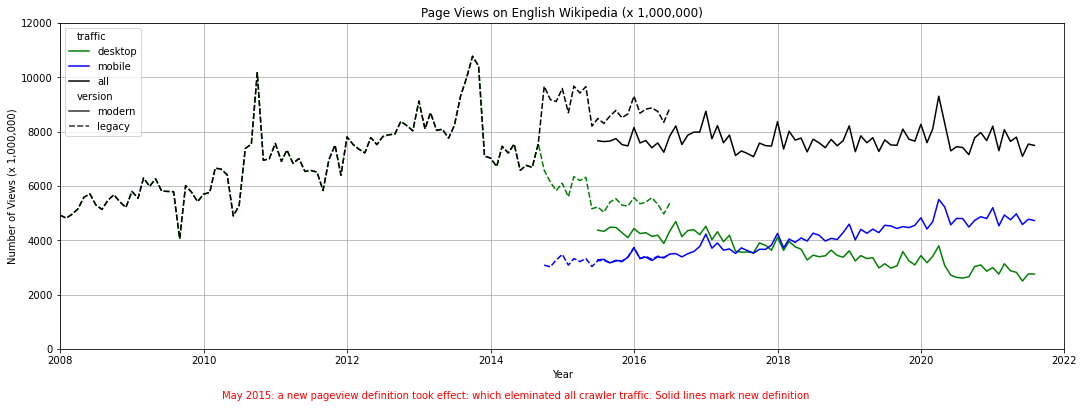

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

p = sns.lineplot(x='time', y='value', hue='traffic', style = 'version', style_order = ['modern','legacy'],
             data=plotDf, palette = ['green', 'blue', 'black'])
p.set_title('Page Views on English Wikipedia (x 1,000,000)')

#plt.legend(labels=["Desktop","Mobile", "All"], title = "Traffic Type")
#ax.xaxis.set_major_locator(plt.MaxNLocator(14))
ax.set(xlabel='Year', ylabel='Number of Views (x 1,000,000)')
plt.grid()
plt.xlim(13879,18993)
plt.yticks(np.insert(p.get_yticks(), 0, 0, axis = 0),[0]+[int(i) for i in p.get_yticks()/1000000])
plt.figtext(0.25,0.01, "May 2015: a new pageview definition took effect: which eleminated all crawler traffic. Solid lines mark new definition", color = 'r')
plt.savefig('Page_views_en-Wikipedia.png')
plt.show()